In [19]:
# import sys
# import os
# import dlib
# import glob
# from skimage import io

In [20]:
# predictor_path = "shape_predictor_68_face_landmarks.dat/data"
# faces_folder_path = "./Eye_chimeraToPublish/Centre"

In [21]:
# detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor(predictor_path)
# win = dlib.image_window()

# for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
#     print("Processing file: {}".format(f))
#     img = io.imread(f)

#     win.clear_overlay()
#     win.set_image(img)

#     # Ask the detector to find the bounding boxes of each face. The 1 in the
#     # second argument indicates that we should upsample the image 1 time. This
#     # will make everything bigger and allow us to detect more faces.
#     dets = detector(img, 1)
#     print("Number of faces detected: {}".format(len(dets)))
#     for k, d in enumerate(dets):
#         print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
#             k, d.left(), d.top(), d.right(), d.bottom()))
#         # Get the landmarks/parts for the face in box d.
#         shape = predictor(img, d)
#         print("Part 0: {}, Part 1: {} ...".format(shape.part(0),
#                                                   shape.part(1)))
#         # Draw the face landmarks on the screen.
#         win.add_overlay(shape)

#     win.add_overlay(dets)
# dlib.hit_enter_to_continue()

AttributeError: module 'dlib' has no attribute 'image_window'

In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline
import os
import glob
from copy import deepcopy
import scipy.io as sio 

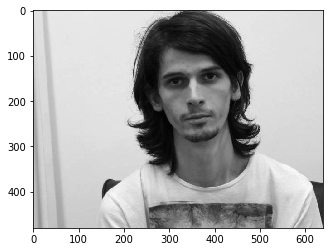

In [2]:
# Define the face and eye classifier
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')
img = mpimg.imread('./data/Eye_chimeraToPublish/0/eyes003019.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
gray = gray.reshape((480,640,1))

In [4]:

img_path = './data/Eye_chimeraToPublish/0/eyes003019.jpg'
mat_path = './data/Eye_chimeraToPublish/00.Centre/eyes003019.mat'
t_img = mpimg.imread(img_path)
t_mat = sio.loadmat(mat_path)['eyePoints']
print(t_mat)
fig = plt.figure(figsize = (10,10))
# plt.imshow(t_img)
n = 0
left_x = t_mat[0][0]
right_x = t_mat[1][0]
top_y = t_mat[2][1]
bottom_y = t_mat[3][1]
# left_eye = t_img[330:331, 151:165,:]
print(left_eye.shape)
plt.imshow(left_eye)
# plt.plot(t_mat[n,0], t_mat[n,1], 'o')
# print(t_mat)

[[303 160]
 [331 159]
 [317 151]
 [316 165]
 [316 157]
 [379 149]
 [405 147]
 [393 140]
 [390 154]
 [392 146]
 [317 151]
 [317 165]
 [392 140]
 [392 154]]


NameError: name 'left_eye' is not defined

[[121  53  49  49]
 [ 48  66  47  47]]


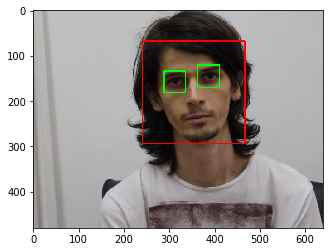

In [6]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
# plt.plot(121,53,'o')
plt.imshow(img)
# cv2.imshow('img',gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
print(eyes)

In [4]:
# load in data
def load_eye_cinmera():
    X = []
    y = []
    for i in range(6):
        faces_folder_path = "./data/Eye_chimeraToPublish/" + str(i)
        for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
            img = io.imread(f)
#             print(img.shape)
            if img.shape != (480, 640, 3):
                img = cv2.resize(img,(640, 480),interpolation=cv2.INTER_CUBIC)
            X.append(img)
            y.append(i)
    return X, y
X, y = load_eye_cinmera()

In [68]:
# load in data, left and right eye separately
def load_eye_cinmera():
    X = []
    y = []
    Mat = []
    X_left = []
    y_left = []
    X_right = []
    y_right = []
    for i in range(7):
        faces_folder_path = "./data/Eye_chimeraToPublish/" + str(i)
        for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
            f_name = os.path.basename(f)
            f_basename = f_name.split(".", 1)[0]
            mat_name = f_basename + ".mat"
            mat_path = os.path.join(faces_folder_path, mat_name)
            
            img = io.imread(f)
            X.append(img)
            y.append(i)
            
            Mat.append(sio.loadmat(mat_path)['eyePoints'])
#         for f in glob.glob(os.path.join(faces_folder_path, "*.mat")):
#             Mat.append(sio.loadmat(f)['eyePoints'])
    return X, y, Mat
X, y, Mat = load_eye_cinmera()

[[304 216]
 [336 211]
 [324 206]
 [319 221]
 [319 213]
 [386 208]
 [417 206]
 [402 200]
 [403 214]
 [402 206]
 [320 206]
 [320 221]
 [402 200]
 [402 214]]


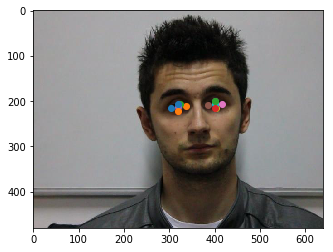

In [90]:
N = 10
plt.imshow(X[N])
print(Mat[N])
for point in Mat[N]:
    plt.plot(point[0], point[1], 'o')


In [127]:
def extract_eye(X, Mat, pad=10):
    """given an image, return the box containing eye."""
    X_left = []
    X_right = []
    for (img, mat) in zip(X, Mat):
        # the four egdes of left and right eyes
        left_left_x = mat[0][0]
        left_right_x = mat[1][0]
        left_top_y = mat[2][1]
        left_bottom_y = mat[3][1]
        right_left_x = mat[5][0]
        right_right_x = mat[6][0]
        right_top_y = mat[7][1]
        right_bottom_y = mat[8][1]
        # cut eyes images from the original one
        left_eye = img[left_top_y-pad : left_bottom_y+pad, left_left_x-pad : left_right_x+pad, :]
        right_eye = img[right_top_y-pad : right_bottom_y+pad, right_left_x-pad : right_right_x+pad, :]
        
        # reshape eye images to 28x28
        X_left.append(cv2.resize(left_eye,(28, 28),interpolation=cv2.INTER_CUBIC))
        X_right.append(cv2.resize(right_eye,(28, 28),interpolation=cv2.INTER_CUBIC))
    return X_left, X_right
X_left, X_right = extract_eye(X, Mat)


In [128]:
X_left_input = np.array(X_left)
X_left_input.shape

(1135, 28, 28, 3)

In [130]:
"""Build a simple regression model"""
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Convolution2D, MaxPooling2D, Cropping2D
from keras.utils import to_categorical

y_ctg = to_categorical(np.array(y), num_classes=7)
print(y_ctg.shape)
model = Sequential()
# input layer, normalize
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(28,28,3)))
# crop 70 rows of pixels on the top and 25 rows of pixels on the bottom.
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(16, 5, 5, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
# output regression layer
model.add(Dense(7))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
res = model.fit(X_left_input, y_ctg, validation_split=0.2, shuffle=True, nb_epoch=5)
model.save("./models/left_init.h5")

(1135, 7)


/home/nqiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), activation="relu")`
  if sys.path[0] == '':
/home/nqiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), activation="relu")`
  
/home/nqiao/anaconda3/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 908 samples, validate on 227 samples
Epoch 1/5
908/908 [==============================] - 0s 478us/step - loss: 7.0155 - acc: 0.1586 - val_loss: 6.6966 - val_acc: 0.0000e+00
Epoch 2/5
908/908 [==============================] - 0s 108us/step - loss: 5.4851 - acc: 0.1487 - val_loss: 6.6748 - val_acc: 0.0000e+00
Epoch 3/5
908/908 [==============================] - 0s 119us/step - loss: 5.4851 - acc: 0.1487 - val_loss: 6.6746 - val_acc: 0.0000e+00
Epoch 4/5
908/908 [==============================] - 0s 115us/step - loss: 5.4851 - acc: 0.1487 - val_loss: 6.6746 - val_acc: 0.0000e+00
Epoch 5/5
908/908 [==============================] - 0s 112us/step - loss: 5.4851 - acc: 0.1487 - val_loss: 6.6746 - val_acc: 0.0000e+00


In [124]:
res.history

{'acc': [0.27973568295067103],
 'loss': [9.4255388864861711],
 'val_acc': [0.0],
 'val_loss': [7.0294777265204251]}

2


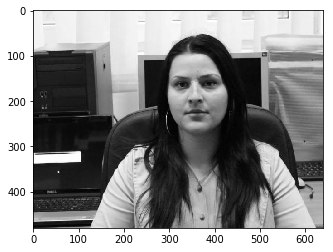

In [18]:
def detect_eyes(img):
    """Detect the left and right eyes in the image, and return two eyes image."""
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     plt.imshow(gray, cmap='gray')
    gray = gray.reshape((480,640,1))
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#     print("len of """Build a simple regression model"""
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Convolution2D, MaxPooling2D, Cropping2D

model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))
# crop 70 rows of pixels on the top and 25 rows of pixels on the bottom.
model.add(Cropping2D(cropping=((70, 25), (0, 0))))
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(16, 5, 5, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
# output regression layer
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=2)

model.save("./models/model_aug_2e.h5")faces: ", len(faces))
    copy_img = deepcopy(img)
    eyes = []
    for (x,y,w,h) in faces:
        cv2.rectangle(copy_img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = copy_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    if eyes is None:
        return None
    # show the facial image
#     plt.imshow(roi_color)
    return eyes
eyes_d = detect_eyes(X[7])
print(len(eyes_d))

314


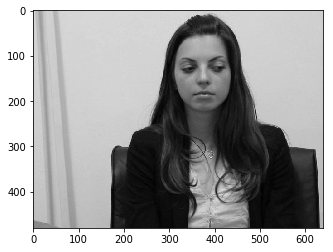

In [19]:
"""314 images have more or less than 2 eyes with viola-jones eye detector."""
count = 0
for img in X:
    eyes_d = detect_eyes(img)
    if len(eyes_d) != 2:
        count += 1
print(count)